### FIFA Data Analysis: Problem Statement
#### Context
In this project, we will be looking at FIFA's player data, which contains information 
such as personal details, wages, physical attributes, technical skills, potential, and 
positional strengths. This is preliminary data of FIFA 2018. Through this project, 
you will get a glimpse of insights into the beautiful game and the decisions a 
football manager goes through.
#### Objective
Preliminary Data Analysis. Explore the dataset and practice extracting basic 
observations about the data using any data analytical tools you are most 
comfortable with. 
You are expected to:
###### Come up with the players' profiles (characteristics of a player) of the different teams/countries.
###### Generate a set of insights and recommendations that will help the coach to understand the competition.
You are expected to perform the analysis to answer the following questions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [2]:
# Displays all columns and rows in data
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [3]:
df = pd.read_excel('FIFA.xlsx')

In [4]:
df.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0.0,Cristiano Ronaldo,32.0,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94.0,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5M,565K,2228.0,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,76.0,7.0,11.0,15.0,14.0,11.0,88.0,29.0,95.0,77.0,92.0,22.0,85.0,95.0,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1.0,L. Messi,30.0,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93.0,93.0,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105M,565K,2154.0,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,90.0,6.0,11.0,15.0,14.0,8.0,71.0,22.0,68.0,87.0,88.0,13.0,74.0,93.0,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2.0,Neymar,25.0,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,94.0,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123M,280K,2100.0,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,84.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,61.0,75.0,77.0,21.0,81.0,90.0,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3.0,L. SuÃ¡rez,30.0,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92.0,92.0,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97M,510K,2291.0,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,84.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,69.0,64.0,86.0,30.0,85.0,92.0,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4.0,M. Neuer,31.0,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92.0,92.0,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61M,230K,1493.0,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,11.0,91.0,90.0,95.0,91.0,89.0,25.0,30.0,78.0,59.0,16.0,10.0,47.0,12.0,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,R. Lewandowski,28.0,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91.0,91.0,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,92M,355K,2143.0,79.0,80.0,78.0,80.0,89.0,87.0,62.0,77.0,85.0,91.0,84.0,15.0,6.0,12.0,8.0,10.0,85.0,39.0,84.0,65.0,83.0,25.0,81.0,91.0,91.0,83.0,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0,84.0,57.0,62.0,87.0,78.0,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,ST,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6.0,De Gea,26.0,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90.0,92.0,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,64.5M,215K,1458.0,57.0,38.0,60.0,43.0,42.0,64.0,17.0,21.0,18.0,13.0,19.0,90.0,85.0,87.0,86.0,90.0,21.0,30.0,67.0,51.0,12.0,13.0,40.0,12.0,88.0,50.0,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK

### Data Cleaning

In [5]:
#converting the variable K,M,B to figures 
def text_to_num(text, bad_data_val = 0):
    d = {
        'K': 1000,
        'M': 1000000,
        'B': 1000000000
    }
    if not isinstance(text, str):
        # Non-strings are bad are missing data in poster's submission
        return bad_data_val

    elif text[-1] in d:
        # separate out the K, M, or B
        num, magnitude = text[:-1], text[-1]
        return int(float(num) * d[magnitude])
    else:
        return float(text)

In [6]:
df['Wage'] = df['Wage'].astype('string').apply(lambda x : text_to_num(x))

In [7]:
df['Value'] = df['Value'].astype('string').apply(lambda x : text_to_num(x))

In [8]:
df['Preferred Positions'].unique() 
#After noticing that players play multiply positions, we base our assumption on the third element

array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ',
       'CDM CAM CM ', 'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ',
       'CM ', 'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ',
       'LM LB ', 'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ',
       'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ',
       'LM RW RM ', 'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ',
       'LM CF CAM ', 'RB ', 'LM CAM LW ', 'LM RM CM ', 'CAM LM ',
       'CAM RM RW ', 'RM CAM ', 'CAM LW RW ', 'LM ', 'LM CAM ',
       'CAM CF ST ', 'CM CB CDM ', 'RW ST ', 'RW LW CM ', 'CF CAM ',
       'LW CM ', 'RWB RB ', 'CAM ', 'ST CF ', 'LM ST ', 'CM CAM ',
       'CF ST ', 'CB RB ', 'CF CM CAM ', 'LM CAM RW LW ', 'LM RM ',
       'LM RW LW ', 'LM CF RM ', 'CAM LW CM ', 'ST LM ', 'LM ST RM ',
       'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ', 'LM RM RW ', 'RW LW ',
       'CM CDM CB ', 'LB CB ', 'ST RM LM ', 'C

In [9]:
df['Positioning'] = df['Preferred Positions'].apply(lambda x: x[:3])

In [10]:
df['Positioning'].unique()

array(['ST ', 'RW ', 'LW ', 'GK ', 'CDM', 'CB ', 'RM ', 'CM ', 'LM ',
       'LB ', 'CAM', 'RB ', 'CF ', 'RWB', 'LWB'], dtype=object)

In [11]:
position_rep ={'CAM':'M',
               'CB ':'D',
               'CDM': 'D',
               'CF ': 'F',
               'CM ': 'M',
               'LAM': 'M',
               'LB ': 'D',
               'LCB': 'D',
               'LCM': 'M',
               'LDM': 'M',
               'LF': 'F',
               'LM ': 'M',
               'LS': 'F',
               'LW ': 'F',
               'LWB': 'M',
               'RAM': 'M',
               'RB ': 'D',
               'RCM': 'M',
               'RDM': 'M',
               'RF': 'F',
               'RM ': 'M',
               'RS': 'F',
               'RW ': 'F',
               'RWB': 'D',
               'ST ': 'F'}

In [12]:
#For easy analysis, we catigorise them into, Striker F, Defender D, Midfielder M and goalkeepers G
df['Positioning'] = df['Positioning'].replace(position_rep)

In [13]:
df['Positioning'].value_counts()

D      6716
M      5898
F      3338
GK     2029
Name: Positioning, dtype: int64

In [45]:
df['Club'].nunique() #there are 647 clubs in this dataset

647

In [47]:
df['Nationality'].nunique()

165

In [14]:
new_columns = ['Aggression', 'Agility', 'Balance', 'Ball control',
               'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
               'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
               'GK positioning', 'GK reflexes', 'Heading accuracy']

In [15]:
to_float = lambda x: eval(x.replace('+', '+').replace('-', '-'))

# apply the lambda function to the series to convert the values to float
for val in new_columns:
    df[val] = df[val].astype('string').apply(to_float)

In [16]:
to_float = lambda x: eval(re.sub(r'\b0\d+', lambda m: str(float(m.group())), x))

df['Acceleration'] = df['Acceleration'].astype('string').apply(to_float)


### 1. Prepare a rank-ordered list of the top 10 countries with the most players. List 5 countries that are producing the most numbers of footballers that play at this level?

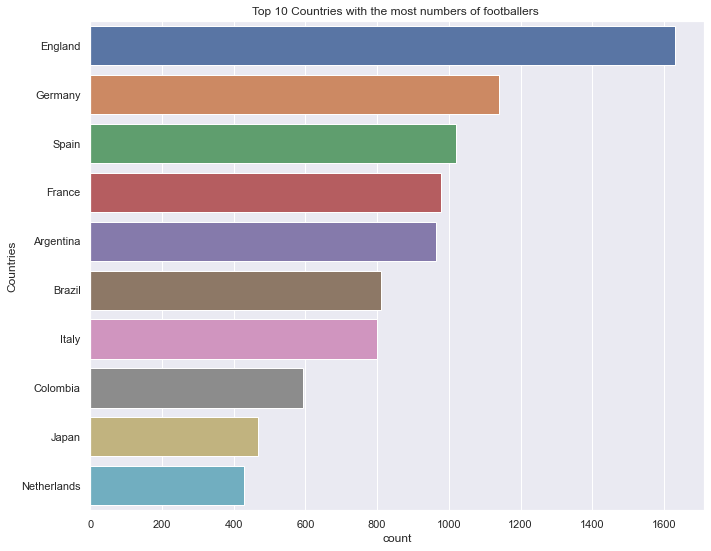

In [17]:
top_countries = df['Nationality'].value_counts().sort_values(ascending=False)[:10]
sns.set_style('white')
sns.set(rc={'figure.figsize':(11,9)})
sns.barplot(x=top_countries.values, y= top_countries.index)
plt.xlabel('count')
plt.ylabel('Countries')
plt.title("Top 10 Countries with the most numbers of footballers ")
plt.show()

### 2. Interpret the age after which a player stops improving.

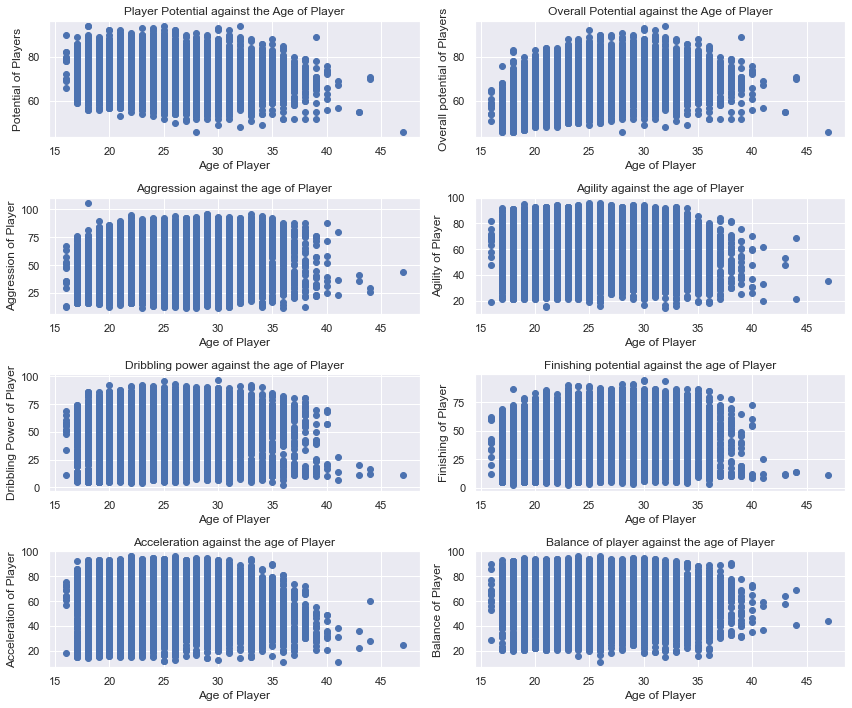

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,10))

# Define a color palette
colors = sns.color_palette('Set2')


# Plot each subplot individually
axes[0, 0].scatter(x='Age', y='Potential', data=df)
axes[0, 0].set_xlabel('Age of Player')
axes[0, 0].set_ylabel('Potential of Players')
axes[0, 0].set_title('Player Potential against the Age of Player')

axes[0, 1].scatter(x='Age', y='Overall', data=df)
axes[0, 1].set_xlabel('Age of Player')
axes[0, 1].set_ylabel('Overall potential of Players')
axes[0, 1].set_title('Overall Potential against the Age of Player')


axes[1, 0].scatter(x='Age', y='Aggression', data=df)
axes[1, 0].set_xlabel('Age of Player')
axes[1, 0].set_ylabel('Aggression of Player')
axes[1, 0].set_title('Aggression against the age of Player')

axes[1, 1].scatter(x='Age', y='Agility', data=df)
axes[1, 1].set_xlabel('Age of Player')
axes[1, 1].set_ylabel('Agility of Player')
axes[1, 1].set_title('Agility against the age of Player')


axes[2, 0].scatter(x='Age', y='Dribbling', data=df)
axes[2, 0].set_xlabel('Age of Player')
axes[2, 0].set_ylabel('Dribbling Power of Player')
axes[2, 0].set_title('Dribbling power against the age of Player')


axes[2, 1].scatter(x='Age', y='Finishing', data=df)
axes[2, 1].set_xlabel('Age of Player')
axes[2, 1].set_ylabel('Finishing of Player')
axes[2, 1].set_title('Finishing potential against the age of Player')


axes[3, 0].scatter(x='Age', y='Acceleration', data=df)
axes[3, 0].set_xlabel('Age of Player')
axes[3, 0].set_ylabel('Acceleration of Player')
axes[3, 0].set_title('Acceleration against the age of Player')


axes[3, 1].scatter(x='Age', y='Balance', data=df)
axes[3, 1].set_xlabel('Age of Player')
axes[3, 1].set_ylabel('Balance of Player')
axes[3, 1].set_title('Balance of player against the age of Player')

sns.set_palette(colors)

# Add space between the subplots
fig.tight_layout()

# Display the subplots
plt.show()


We notice a huge decline after Age 30 for most of the players.

### 3. Which type of offensive player tends to get paid the most: the striker, the Defender, or the Midfielder? Visualize through a scatter plot for all three.¶

In [18]:
offensive_players = df[(df['Positioning'] == "F") + (df['Positioning']=="D") + (df['Positioning']=="M")]

In [19]:
offensive_players

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0.0,Cristiano Ronaldo,32.0,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94.0,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228.0,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,76.0,7.0,11.0,15.0,14.0,11.0,88.0,29.0,95.0,77.0,92.0,22.0,85.0,F,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1.0,L. Messi,30.0,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93.0,93.0,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154.0,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,90.0,6.0,11.0,15.0,14.0,8.0,71.0,22.0,68.0,87.0,88.0,13.0,74.0,F,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2.0,Neymar,25.0,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,94.0,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100.0,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,84.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,61.0,75.0,77.0,21.0,81.0,F,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3.0,L. SuÃ¡rez,30.0,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92.0,92.0,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291.0,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,84.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,69.0,64.0,86.0,30.0,85.0,F,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
5,5.0,R. Lewandowski,28.0,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91.0,91.0,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,92000000.0,355000.0,2143.0,79.0,80.0,78.0,80.0,89.0,87.0,62.0,77.0,85.0,91.0,84.0,15.0,6.0,12.0,8.0,10.0,85.0,39.0,84.0,65.0,83.0,25.0,81.0,F,91.0,83.0,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0,84.0,57.0,62.0,87.0,78.0,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,ST,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17974,17974.0,J. Keeble,18.0,https://cdn.sofifa.org/48/18/players/240404.png,England,https://cdn.sofifa.org/flags/14.png,46.0,56.0,Grimsby Town,https://cdn.sofifa.org/24/18/teams/92.png,40000.0,1000.0,1105.0,66.0,40.0,45.0,48.0,34.0,37.0,28.0,28.0,29.0,15.0,27.0,5.0,10.0,12.0,12.0,11.0,43.0,48.0,54.0,27.0,16.0,40.0,25.0,D,48.0,30.0,30.0,49.0,60.0,52.0,52.0,42.0,28.0,24.0,32.0,45.0,41.0,33.0,34.0,32.0,46.0,45.0,34.0,41.0,33.0,35.0,33.0,34.0,44.0,CB,32.0,46.0,45.0,34.0,41.0,33.0,35.0,33.0,34.0,44.0,33.0
17975,17975.0,T. KÃ¤ÃŸemodel,28.0,https://cdn.sofifa.org/

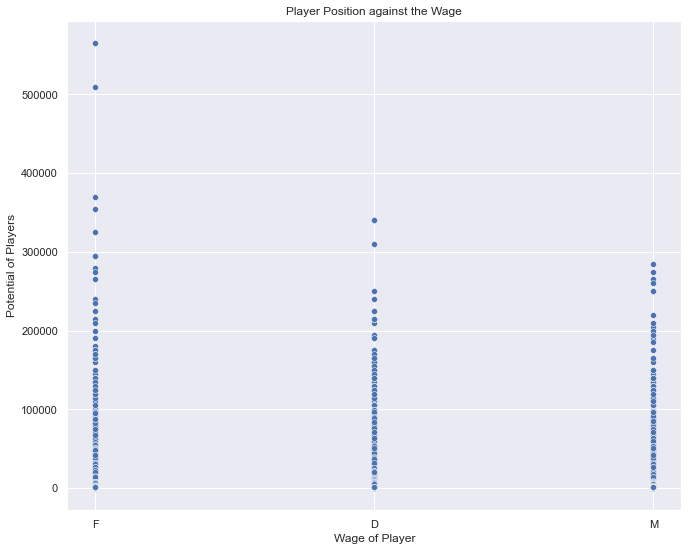

In [22]:
sns.scatterplot(y='Wage', x='Positioning', data=offensive_players)
# Customize the plot
plt.xlabel('Wage of Player')
plt.ylabel('Positioning of Players')
plt.title('Player Position against the Wage')
plt.show()

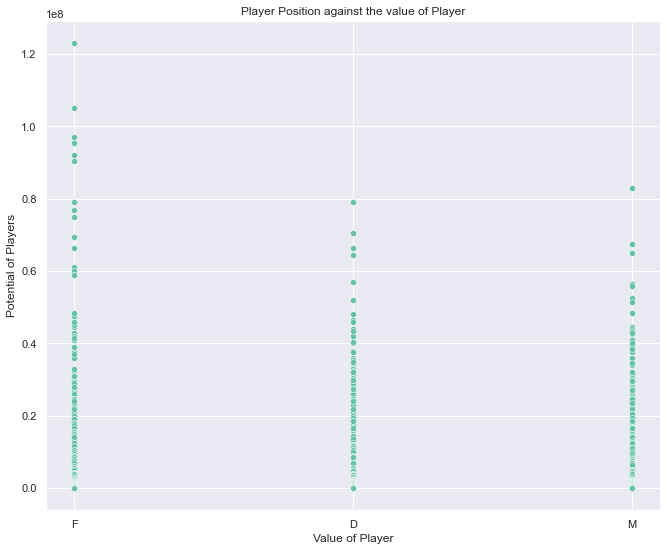

In [116]:
sns.scatterplot(y='Value', x='Positioning', data=offensive_players)
# Customize the plot
plt.xlabel('Value of Player')
plt.ylabel('Potential of Players')
plt.title('Player Position against the value of Player')
plt.show()

### 4. Top 5 players for every preferred position in terms of overall as well as potential points. Who was the best in 2018?


In [26]:
off_pos = df['Positioning'].unique().tolist()

In [29]:
off_pos 

['F', 'GK ', 'D', 'M']

In [27]:
player2 = []
for i in off_pos:
    player = df[df['Positioning'] == i].sort_values('Overall', ascending = False)
    player2.append(player)

player_values = {}    
for i in range(len(player2)):
    player_values.update({i:player2[i].head(5)['Name'].values})

In [28]:
player_values

{0: array(['Cristiano Ronaldo', 'L. Messi', 'Neymar', 'L. SuÃ¡rez',
        'R. Lewandowski'], dtype=object),
 1: array(['M. Neuer', 'De Gea', 'T. Courtois', 'G. Buffon', 'J. Oblak'],
       dtype=object),
 2: array(['T. Kroos', 'Sergio Ramos', 'L. ModriÄ‡', 'G. Chiellini', 'Thiago'],
       dtype=object),
 3: array(['K. De Bruyne', 'A. SÃ¡nchez', 'N. KantÃ©', 'C. Eriksen',
        'A. Vidal'], dtype=object)}

In [30]:
df3 = pd.DataFrame.from_dict(player_values)
df3

,0,1,2,3
0,Cristiano Ronaldo,M. Neuer,T. Kroos,K. De Bruyne
1,L. Messi,De Gea,Sergio Ramos,A. SÃ¡nchez
2,Neymar,T. Courtois,L. ModriÄ‡,N. KantÃ©
3,L. SuÃ¡rez,G. Buffon,G. Chiellini,C. Eriksen
4,R. Lewandowski,J. Oblak,Thiago,A. Vidal


In [31]:
df3 = df3.rename(columns={0: 'F', 1: 'GK', 2: 'D', 3: 'M'})

In [32]:
df3 #top 5 players for each position based on their overall performance

,F,GK,D,M
0,Cristiano Ronaldo,M. Neuer,T. Kroos,K. De Bruyne
1,L. Messi,De Gea,Sergio Ramos,A. SÃ¡nchez
2,Neymar,T. Courtois,L. ModriÄ‡,N. KantÃ©
3,L. SuÃ¡rez,G. Buffon,G. Chiellini,C. Eriksen
4,R. Lewandowski,J. Oblak,Thiago,A. Vidal


In [33]:
player2 = []
for i in off_pos:
    player = df[df['Positioning'] == i].sort_values('Potential', ascending = False)
    player2.append(player)

player_values = {}    
for i in range(len(player2)):
    player_values.update({i:player2[i].head(5)['Name'].values})

In [34]:
player_values

{0: array(['Cristiano Ronaldo', 'Neymar', 'K. MbappÃ©', 'L. Messi',
        'P. Dybala'], dtype=object),
 1: array(['G. Donnarumma', 'J. Oblak', 'M. Neuer', 'T. Courtois', 'De Gea'],
       dtype=object),
 2: array(['R. Varane', 'P. Pogba', 'M. Verratti', 'T. Kroos', 'Thiago'],
       dtype=object),
 3: array(['K. De Bruyne', 'O. DembÃ©lÃ©', 'L. SanÃ©', 'T. Lemar',
        'Bernardo Silva'], dtype=object)}

In [35]:
df4 = pd.DataFrame.from_dict(player_values)
df4

,0,1,2,3
0,Cristiano Ronaldo,G. Donnarumma,R. Varane,K. De Bruyne
1,Neymar,J. Oblak,P. Pogba,O. DembÃ©lÃ©
2,K. MbappÃ©,M. Neuer,M. Verratti,L. SanÃ©
3,L. Messi,T. Courtois,T. Kroos,T. Lemar
4,P. Dybala,De Gea,Thiago,Bernardo Silva


In [36]:
df4 = df3.rename(columns={0: 'F', 1: 'GK', 2: 'D', 3: 'M'})

In [37]:
df4 #top 5 players for each position based on their potential

,F,GK,D,M
0,Cristiano Ronaldo,M. Neuer,T. Kroos,K. De Bruyne
1,L. Messi,De Gea,Sergio Ramos,A. SÃ¡nchez
2,Neymar,T. Courtois,L. ModriÄ‡,N. KantÃ©
3,L. SuÃ¡rez,G. Buffon,G. Chiellini,C. Eriksen
4,R. Lewandowski,J. Oblak,Thiago,A. Vidal


### 5. Which club(s) has the maximum share of players from England? Which club(s) has the maximum share of players from Spain? Which club(s) have the maximum share of players from Germany?


In [38]:
country = ['England', 'Spain', 'Germany']

In [39]:
club_variables = {}
for i in country:
    particular_country = df[df['Nationality'] == i]
    maximum = particular_country['Club'].value_counts().sort_values(ascending=False)[:2]
    print(i)
    spread = {}
    for k in range(len(maximum.index)):
        print(maximum.index[k], maximum.values[k])
        spread.update({maximum.index[k]: maximum.values[k]})
    club_variables.update({i:spread})

England
Shrewsbury 24
Bolton Wanderers 24
Spain
CA Osasuna 27
Athletic Club de Bilbao 26
Germany
Holstein Kiel 26
FSV Zwickau 23


In [40]:
club_variables

{'England': {'Shrewsbury': 24, 'Bolton Wanderers': 24},
 'Spain': {'CA Osasuna': 27, 'Athletic Club de Bilbao': 26},
 'Germany': {'Holstein Kiel': 26, 'FSV Zwickau': 23}}

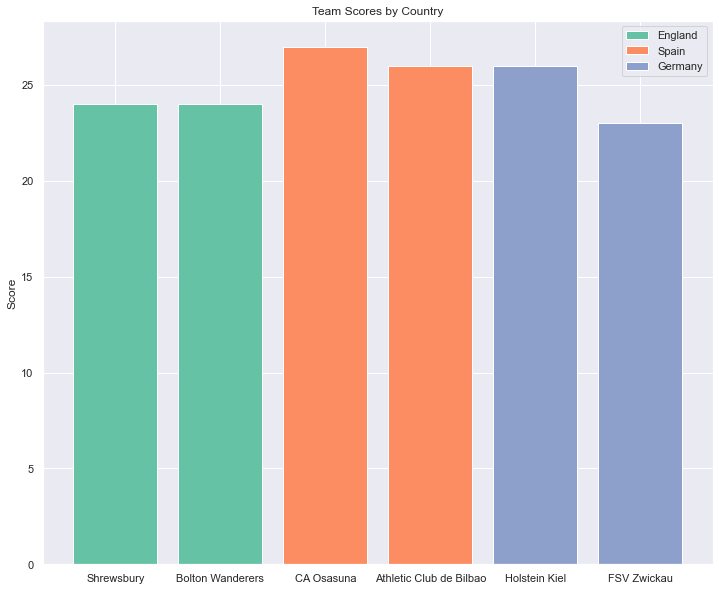

In [41]:
# Define the data
data = {'England': {'Shrewsbury': 24, 'Bolton Wanderers': 24},
        'Spain': {'CA Osasuna': 27, 'Athletic Club de Bilbao': 26},
        'Germany': {'Holstein Kiel': 26, 'FSV Zwickau': 23}}

# Create a list of the countries
countries = list(data.keys())

# Create a list of the total scores for each country
totals = [sum(data[country].values()) for country in countries]

# Create a list of the team names for each country
teams = [list(data[country].keys()) for country in countries]

# Create a list of the scores for each team for each country
scores = [list(data[country].values()) for country in countries]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12,10))

# Create the bars for each team for each country
for i in range(len(countries)):
    ax.bar(teams[i], scores[i], label=countries[i])

# Set the y-axis label
ax.set_ylabel('Score')

# Set the title
ax.set_title('Team Scores by Country')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### 6. As a National coach of the France team, you want to compare the national team of England, Spain, Italy, and Germany to understand the competition. The formation of the teams is restricted to 4-3-3 (4 defenders, 3 midfielders, 3 forwards, 1 Goal Keeper) and players with an overall value of more than 75 are preferred, now form the best team for each of the mentioned countries and compare them. Note down all the insights that you as a business analyst should share with the coach.

In [42]:
countries = ['England', 'Spain', 'Italy', 'Germany']

In [43]:
df[df['Overall'] > 75]

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0.0,Cristiano Ronaldo,32.0,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94.0,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228.0,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,76.0,7.0,11.0,15.0,14.0,11.0,88.0,29.0,95.0,77.0,92.0,22.0,85.0,F,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1.0,L. Messi,30.0,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93.0,93.0,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154.0,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,90.0,6.0,11.0,15.0,14.0,8.0,71.0,22.0,68.0,87.0,88.0,13.0,74.0,F,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2.0,Neymar,25.0,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,94.0,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100.0,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,84.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,61.0,75.0,77.0,21.0,81.0,F,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3.0,L. SuÃ¡rez,30.0,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92.0,92.0,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291.0,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,84.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,69.0,64.0,86.0,30.0,85.0,F,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4.0,M. Neuer,31.0,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92.0,92.0,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493.0,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,11.0,91.0,90.0,95.0,91.0,89.0,25.0,30.0,78.0,59.0,16.0,10.0,47.0,GK,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,1582.0,Alberto Moreno,24.0,https://cdn.sofifa.org/48/18/players/205566.png,Spain,https://cdn.sofifa.org/flags/45.png,76.0,79.0,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,8000000.0,76000.0,2028.0,87.0,83.0,86.0,87.0,79.0,63.0,78.0,59.0,76.0,59.0,40.0,10.0,14.0,9.0,10.0,11.0,61.0,69+1,85.0,64.0,74.0,63+1,54.0,D,69.0,74.0,80.0,76.0,88.0,85.0,72+1,64.0,58.0,35.0,72.0,71.0,71.0,72.0,71.0,72.0,75.0,71.0,71.0,71.0,72.0,74.0,70.0,74.0,76.0,LB,72.0,75.0,71.0,71.0,71.0,72.0,74.0,70.0,74.0,76.0,70.0
1583,1583.0,Diego Rico,24.0,https://cdn.sofifa.org/48/18/players/220414.png,Spain,htt

In [48]:
off_pos

['F', 'GK ', 'D', 'M']

In [101]:
Country = []
new_off = ['F', 'D', 'M']


player2 = []
for j in countries:
    player = df[df['Nationality'] == j].sort_values('Potential', ascending = False)
    player2.append(player)    

In [103]:
len(player2)

4

In [96]:
player2[1]

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
6,6.0,De Gea,26.0,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90.0,92.0,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,64500000.0,215000.0,1458.0,57.0,38.0,60.0,43.0,42.0,64.0,17.0,21.0,18.0,13.0,19.0,90.0,85.0,87.0,86.0,90.0,21.0,30.0,67.0,51.0,12.0,13.0,40.0,GK,88.0,50.0,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,93.0,Marco Asensio,21.0,https://cdn.sofifa.org/48/18/players/220834.png,Spain,https://cdn.sofifa.org/flags/45.png,84.0,92.0,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,46000000.0,175000.0,1998.0,79.0,45.0,78.0,76.0,86.0,82.0,79.0,83.0,83.0,82.0,76.0,13.0,9.0,6.0,12.0,10.0,50.0,45.0,57.0,81.0,87.0,29.0,62.0,F,78.0,86.0,84.0,39.0,77.0,73.0,42.0,61.0,83.0,75.0,82.0,50.0,62.0,81.0,78.0,82.0,60.0,50.0,78.0,62.0,81.0,81.0,77.0,81.0,65.0,LW LM RM CAM,82.0,60.0,50.0,78.0,62.0,81.0,81.0,77.0,81.0,65.0,77.0
22,22.0,Thiago,26.0,https://cdn.sofifa.org/48/18/players/189509.png,Spain,https://cdn.sofifa.org/flags/45.png,88.0,90.0,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,70500000.0,225000.0,2185.0,77.0,57.0,90.0,86.0,92.0,83.0,72.0,85.0,90.0,69.0,77.0,6.0,11.0,7.0,9.0,13.0,58.0,78.0,75.0,90.0,82.0,49.0,75.0,D,84.0,91.0,75.0,62.0,68.0,75.0,64.0,59.0,86.0,90.0,86.0,66.0,76.0,83.0,85.0,86.0,72.0,66.0,85.0,76.0,83.0,83.0,77.0,83.0,75.0,CDM CAM CM,86.0,72.0,66.0,85.0,76.0,83.0,83.0,77.0,83.0,75.0,77.0
214,214.0,SaÃºl,22.0,https://cdn.sofifa.org/48/18/players/208421.png,Spain,https://cdn.sofifa.org/flags/45.png,82.0,90.0,AtlÃ©tico Madrid,https://cdn.sofifa.org/24/18/teams/240.png,32000000.0,59000.0,2092.0,72.0,66.0,76.0,68.0,84.0,80.0,69.0,63.0,82.0,71.0,60.0,7.0,13.0,12.0,10.0,9.0,83.0,78.0,79.0,80.0,70.0,69.0,54.0,M,82.0,85.0,74.0,77.0,73.0,80.0,82.0,76.0,79.0,30.0,80.0,78.0,79.0,79.0,81.0,80.0,78.0,78.0,81.0,79.0,79.0,79.0,77.0,78.0,78.0,RM CM,80.0,78.0,78.0,81.0,79.0,79.0,79.0,77.0,78.0,78.0,77.0
10,10.0,Sergio Ramos,31.0,https://cdn.sofifa.org/48/18/players/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,90.0,90.0,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,52000000.0,310000.0,2153.0,75.0,84.0,79.0,60.0,84.0,80.0,66.0,73.0,61.0,60.0,67.0,11.0,8.0,9.0,7.0,11.0,91.0,88.0,93.0,72.0,55.0,86.0,68.0,D,85.0,78.0,79.0,91.0,77.0,84.0,89.0,81.0,63.0,66.0,70.0,87.0,83.0,70.0,74.0,70.0,84.0,87.0,74.0,83.0,70.0,71.0,72.0,69.0,81.0,CB,70.0,84.0,87.0,74.0,83.0,70.0,71.0,72.0,69.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,17637.0,Hugo,23.0,https://cdn.sofifa.org/48/18/players/231163.png,Spain,https://cdn.sofifa.org/flags/45.png,52.0,61.0,Albacete BalompiÃ©,https://cdn.sofifa.org/24/18/teams/1854.png,60000.0,1000.0,826.0,21.0,21.0,35.0,46.0,13.0,35.0,13.0,13.0,13.0,7.0,13.0,46.0,56.0,48.0,46.0,58.0,12.0,12.0,56.0,15.0,8.0,6.0,12.0,GK,51.0,23.0,24.0,13.0,27.0,16.0,13.0,49.0,27.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14777,14777.0,Calzado,33.0,https://cdn.sofifa.org/48/18/players/240792.png,Spain,https://cdn.sofifa.org/fla

# England

In [90]:
player2[0][player2[0]['Positioning'] == 'F'].head(4)['Name'].values

array(['M. Ã–zil', 'K. Havertz', 'T. Werner', 'M. Meyer'], dtype=object)

In [111]:
player2[0][player2[0]['Positioning'] == 'M'].head(3)['Name'].values

array(['A. Gomes', 'D. Alli', 'M. Rashford'], dtype=object)

In [106]:
player2[0][player2[0]['Positioning'] == 'D'].head(3)['Name'].values

array(['M. Keane', 'R. Holding', 'A. Oxlade-Chamberlain'], dtype=object)

Based on the Data, to improve performance in England, 
+ Strikers: M. Ã–zil, K. Havertz, T. Werner, M. Meyer
+ Midfielders: A. Gomes, D. Alli, M. Rashford
+ Defender: M. Keane, R. Holding, A. Oxlade-Chamberlain
##### A team comprising of the above players in the obvious positions, will improve their chances at success.

# Spain

In [107]:
player2[1][player2[1]['Positioning'] == 'D'].head(3)['Name'].values

array(['Thiago', 'Sergio Ramos', 'HÃ©ctor BellerÃ\xadn'], dtype=object)

In [97]:
player2[1][player2[1]['Positioning'] == 'F'].head(4)['Name'].values

array(['Marco Asensio', 'Deulofeu', 'Morata', 'Suso'], dtype=object)

In [112]:
player2[1][player2[1]['Positioning'] == 'M'].head(3)['Name'].values

array(['SaÃºl', 'Isco', 'Dani Ceballos'], dtype=object)

Based on the Data, to improve performance in Spain, 
+ Strikers: 'Marco Asensio', 'Deulofeu', 'Morata', 'Suso'
+ Midfielders: 'SaÃºl', 'Isco', 'Dani Ceballos'
+ Defender: 'Thiago', 'Sergio Ramos', 'HÃ©ctor BellerÃ\xadn'
##### A team comprising of the above players in the obvious positions, will improve their chances at success.

# Italy

In [104]:
player2[2][player2[2]['Positioning'] == 'F'].head(4)['Name'].values

array(['A. Belotti', 'D. Berardi', 'F. Chiesa', 'L. Insigne'],
      dtype=object)

In [108]:
player2[2][player2[2]['Positioning'] == 'D'].head(3)['Name'].values

array(['M. Verratti', 'G. Chiellini', 'L. Bonucci'], dtype=object)

In [114]:
player2[2][player2[2]['Positioning'] == 'M'].head(3)['Name'].values

array(['F. Bernardeschi', 'N. Barella', 'M. Benassi'], dtype=object)

Based on the Data, to improve performance in Italy, 
+ Strikers: 'A. Belotti', 'D. Berardi', 'F. Chiesa', 'L. Insigne'
+ Midfielders: 'F. Bernardeschi', 'N. Barella', 'M. Benassi'
+ Defender: 'M. Verratti', 'G. Chiellini', 'L. Bonucci'
##### A team comprising of the above players in the obvious positions, will improve their chances at success.

# Germany

In [105]:
player2[3][player2[3]['Positioning'] == 'F'].head(4)['Name'].values

array(['M. Ã–zil', 'K. Havertz', 'T. Werner', 'M. Meyer'], dtype=object)

In [109]:
player2[3][player2[3]['Positioning'] == 'D'].head(3)['Name'].values

array(['T. Kroos', 'N. SÃ¼le', 'J. Boateng'], dtype=object)

In [115]:
player2[3][player2[3]['Positioning'] == 'M'].head(3)['Name'].values

array(['L. SanÃ©', 'J. Brandt', 'S. Gnabry'], dtype=object)

Based on the Data, to improve performance in Germany, 
+ Strikers: 'M. Ã–zil', 'K. Havertz', 'T. Werner', 'M. Meyer'
+ Midfielders: 'L. SanÃ©', 'J. Brandt', 'S. Gnabry'
+ Defender: 'T. Kroos', 'N. SÃ¼le', 'J. Boateng'
##### A team comprising of the above players in the obvious positions, will improve their chances at success.

Based on both the Value and Wage earned by Players, Strikers are paid the most. The highest earner, earning over 500k. It appears there’s a relationship between the performance of the players and their wages. As players get older, they tend to improve


At age 30 - 35, we notice the players performance starts to depreciate based on variables such as aggression, acceleration so younger players need to be considered.


In England, Shewsbury and Bolton Wanderers had the highest spread of players, also in Spain CA Osasuna and Athletic club de bilbao had the largest spread, additionally in Germany, Holstein Kiel and FSV Zwickau had massive spreads.
